In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [2]:
df = pd.read_csv('group_by_player.csv')

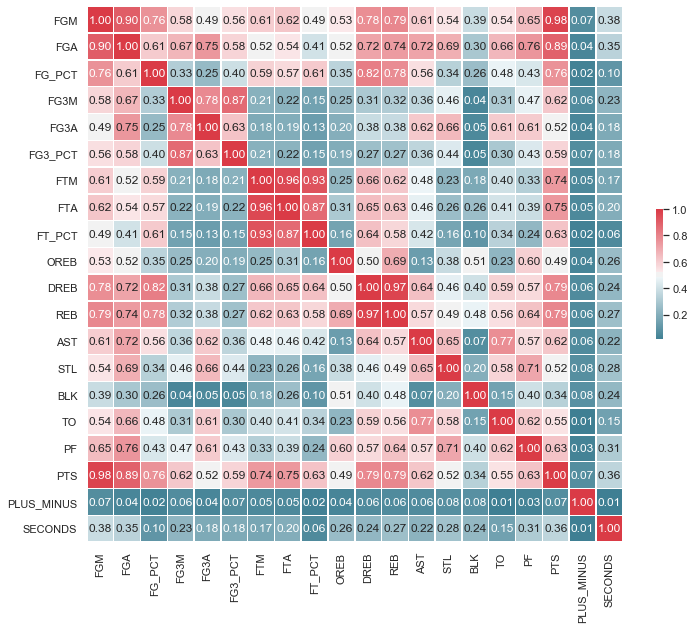

In [3]:
sns.set(style="white")
df_corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .2},annot=True, fmt=".2f")

### Euclidean distance between players

In [4]:
## euclidean distance based on player abilities

#Import Euclidean Distance Packages
from sklearn.preprocessing import normalize
from scipy.spatial.distance import pdist, squareform

In [5]:
cols = list(df.columns)[1:] ## exclude name 

In [6]:
len(cols)

20

In [7]:
#normalize vector for each player 
#norm_df = pd.DataFrame(normalize(df[cols] , axis=1, copy=True, return_norm=False))

In [8]:
#Calculate Euclidean Distance between each player

dist = pdist(df[cols], 'euclidean')
dis_df = pd.DataFrame(squareform(dist))

In [9]:
import pandas as pd
from sklearn import preprocessing

x = dis_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)

In [11]:
normalized_df.set_index(df["PLAYER_NAME"],inplace = True)

In [12]:
normalized_df.columns = list(df["PLAYER_NAME"])

In [13]:
normalized_df

AJ Hammons  AJ Price  Aaron Brooks  Aaron Craft  \
PLAYER_NAME                                                           
AJ Hammons            0.000000  0.359964      0.363578     0.079713   
AJ Price              0.310251  0.000000      0.005659     0.255309   
Aaron Brooks          0.315145  0.005691      0.000000     0.260590   
Aaron Craft           0.073829  0.274353      0.278447     0.000000   
Aaron Gordon          0.196671  0.131799      0.136696     0.132662   
...                        ...       ...           ...          ...   
Zion Williamson       0.053245  0.299077      0.303044     0.025471   
Zoran Dragic          0.300891  0.709065      0.710707     0.404546   
Zoran Planinic        0.104055  0.239254      0.243547     0.032665   
Zydrunas Ilgauskas    0.229654  0.093584      0.098711     0.168343   
Zylan Cheatham        0.019857  0.339550      0.343266     0.060976   

                    Aaron Gordon  Aaron Gray  Aaron Harrison  Aaron Holiday  \
PLAYER_NAME                                                                   
AJ Hammons              0.244820    0.230399        0.005436       0.317916   
AJ Price                0.141407    0.151345        0.313533       0.065760   
Aaron Brooks            0.147494    0.157363        0.318401       0.071823   
Aaron Craft             0.152950    0.139599        0.078183       0.226719   
Aaron Gordon            0.000000    0.011589        0.200474       0.074874   
...                          ...         ...             ...            ...   
Zion Williamson         0.179736    0.166073        0.058114       0.252970   
Zoran Dragic            0.619363    0.600605        0.294742       0.689957   
Zoran Planinic          0.115296    0.102379        0.108292       0.189311   
Zydrunas Ilgauskas      0.041390    0.052379        0.233350       0.033975   
Zylan Cheatham          0.222930    0.208794        0.023227       0.296297   

                    Aaron Jackson  Aaron McKie  ...  Zaza Pachulia  \
PLAYER_NAME                                     ...                  
AJ Hammons               0.234281     0.336695  ...       0.386485   
AJ Price                 0.471851     0.036362  ...       0.041440   
Aaron Brooks             0.475598     0.042242  ...       0.036005   
Aaron Craft              0.290781     0.247967  ...       0.304425   
Aaron Gordon             0.384868     0.100229  ...       0.167777   
...                           ...          ...  ...            ...   
Zion Williamson          0.274690     0.273639  ...       0.328089   
Zoran Dragic             0.004039     0.698487  ...       0.721122   
Zoran Planinic           0.313944     0.211593  ...       0.270780   
Zydrunas Ilgauskas       0.410139     0.060701  ...       0.131116   
Zylan Cheatham           0.247888     0.315537  ...       0.366914   

                    Zeljko Rebraca  Zendon Hamilton  Zhaire Smith   Zhou Qi  \
PLAYER_NAME                                                                   
AJ Hammons                0.370866         0.053464      0.011144  0.174896   
AJ Price                  0.017096         0.273418      0.317767  0.430887   
Aaron Brooks              0.011505         0.278571      0.322609  0.434923   
Aaron Craft               0.286701         0.024320      0.084006  0.235769   
Aaron Gordon              0.146572         0.153755      0.205449  0.337155   
...                            ...              ...           ...       ...   
Zion Williamson           0.311054         0.010980      0.063194  0.218496   
Zoran Dragic              0.714018         0.370387      0.286731  0.073424   
Zoran Planinic            0.252203         0.056186      0.113868  0.260730   
Zydrunas Ilgauskas        0.109064         0.188555      0.238025  0.364395   
Zylan Cheatham            0.350750         0.035495      0.030553  0.189556   

                    Zion Williamson  Zoran Dragic  Zoran Planinic  \
PLAYER_NAME                                                 

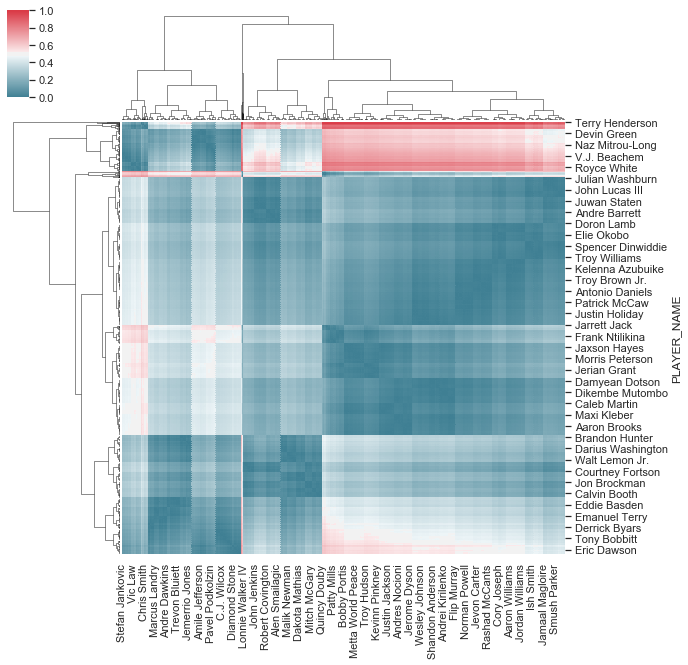

In [14]:
sns.clustermap(normalized_df,cmap=cmap)

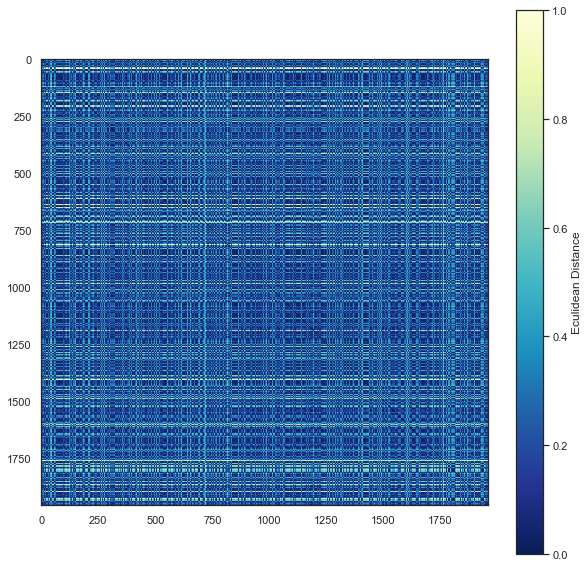

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(normalized_df, cmap='YlGnBu_r')
cbar = plt.colorbar()
cbar.set_label('Eculidean Distance')

### Pair two players with the most similar abilities

In [16]:
closest = np.where(normalized_df.eq(normalized_df[normalized_df != 0].min()),normalized_df.columns,False)
# Remove false from the array and get the column names as list
close_player_df = pd.DataFrame()
close_player_df["PLAYER_NAME"] = df["PLAYER_NAME"]
close_player_df['CLOSE_PLAYER_ABILITY'] = [i[i.astype(bool)].tolist() for i in closest]

In [17]:
close_player_df

PLAYER_NAME                              CLOSE_PLAYER_ABILITY
0             AJ Hammons                                                []
1               AJ Price                                                []
2           Aaron Brooks  [Greg Buckner, Jerome Dyson, Quentin Richardson]
3            Aaron Craft                                    [Daniel Orton]
4           Aaron Gordon                                     [Kirk Snyder]
...                  ...                                               ...
1953     Zion Williamson                                                []
1954        Zoran Dragic                                                []
1955      Zoran Planinic                                     [Theo Pinson]
1956  Zydrunas Ilgauskas                    [Al Horford, Donovan Mitchell]
1957      Zylan Cheatham                                                []

[1958 rows x 2 columns]

In [ ]:
############ matched player list

### Hierarchical Dendrogram

In [18]:
import scipy.cluster.hierarchy as hac

In [26]:
cluster_hac = hac.linkage(df[cols],method="ward")

In [29]:
len(cluster_hac)

1957

In [48]:
plt.figure(figsize=(50, 800))
dendogram = hac.dendrogram(cluster_hac, leaf_font_size=50,orientation='right',show_leaf_counts = True,show_contracted=True,labels=normalized_df.index)
plt.title('Hierarchical Clustering Dendrogram', fontsize=50)
plt.xlabel('Distance', fontsize=50)
plt.ylabel('Player', fontsize=50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()